In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
np.random.seed(123)
n_samples = 50
n_features = 5000

## The wrong way

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
n_repeats = 50
cv_errors = []
for i in range(n_repeats):
    X = np.random.normal(size=(n_samples, n_features))
    y = np.random.binomial(1, 0.5, size=n_samples)
    corr = np.abs(np.corrcoef(X.T, y))[n_features, :-1]
    top_100 = np.argsort(corr)[-100:]
    X_top = X[:, top_100]
    cv_error = 1 - np.mean(cross_val_score(knn, X_top, y, cv=5, scoring='accuracy'))
    cv_errors.append(cv_error)

# Print results
print("Mean CV error: {:.2%}".format(np.mean(cv_errors)))
print("Standard deviation of CV error: {:.2%}".format(np.std(cv_errors)))

Mean CV error: 1.28%
Standard deviation of CV error: 1.64%


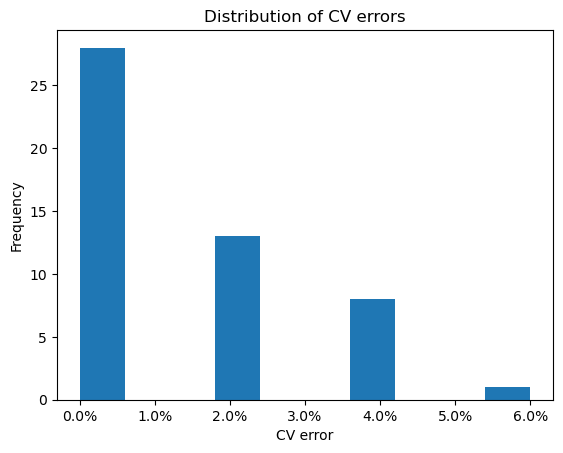

In [38]:
fig, ax = plt.subplots()
ax.hist(cv_errors)
ax.set_xlabel("CV error")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of CV errors")
ax.xaxis.set_major_formatter('{x:.1%}')

## The right way

In [39]:
n_top_features = 100
n_repeats = 50
cv_error_dist = np.zeros(n_repeats)
for i in range(n_repeats):
    X = np.random.normal(0, 1, size=(50, 5000))
    y = np.random.binomial(1, 0.5, size=50)

    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    cv_errors = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        corr_with_labels = np.abs(np.corrcoef(X_train.T, y_train)[n_features, :-1])
        top_features_idx = np.argsort(corr_with_labels)[-n_top_features:]
        X_train_top = X_train[:, top_features_idx]
        X_test_top = X_test[:, top_features_idx]

        clf = KNeighborsClassifier(n_neighbors=1)
        clf.fit(X_train_top, y_train)

        y_pred = clf.predict(X_test_top)
        error = 1 - np.mean(y_pred == y_test)
        cv_errors.append(error)

    cv_error_dist[i] = np.mean(cv_errors)

In [40]:
# Print results
print("Mean CV error: {:.2%}".format(np.mean(cv_error_dist)))
print("Standard deviation of CV error: {:.2%}".format(np.std(cv_error_dist)))

Mean CV error: 49.04%
Standard deviation of CV error: 7.16%


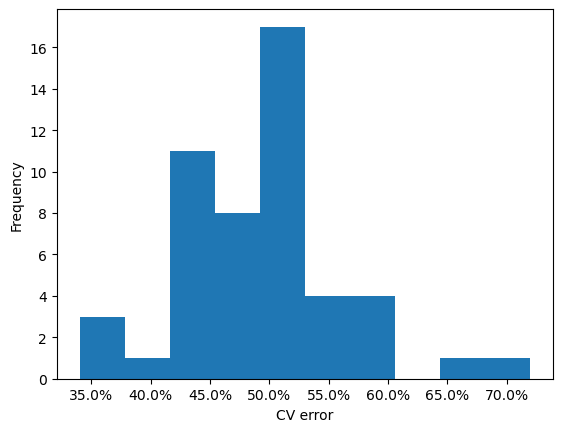

In [41]:
fig, ax = plt.subplots()
plt.hist(cv_error_dist)
plt.xlabel('CV error')
plt.ylabel('Frequency')
ax.xaxis.set_major_formatter('{x:.1%}')
plt.show()